$$ Gradient \space Descent \space Variations $$
$$ Batch, \space Mini Batch, \space Stochastic $$


# `01` Import Necessary Libraries

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm

from tabulate import tabulate
import seaborn as sns
sns.set(style="whitegrid", palette="Set2")

import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.simplefilter("ignore")

plt.rcParams["font.family"] = "DejaVu Sans"

%matplotlib inline

# `02` Create Data

- Our dataset or set of data points consists of a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that:<br>
<b>`yi = a*xi + b (and a = -2, b = 1)`</b>


In [ ]:
x = np.linspace(0,20,100)
y = -2*x + 1

In [ ]:
Headers = ("x","y")
print(tabulate(np.array([x, y]).T, headers = Headers,tablefmt='fancy_grid'))

╒═══════════╤════════════╕
│         x │          y │
╞═══════════╪════════════╡
│  0        │   1        │
├───────────┼────────────┤
│  0.20202  │   0.59596  │
├───────────┼────────────┤
│  0.40404  │   0.191919 │
├───────────┼────────────┤
│  0.606061 │  -0.212121 │
├───────────┼────────────┤
│  0.808081 │  -0.616162 │
├───────────┼────────────┤
│  1.0101   │  -1.0202   │
├───────────┼────────────┤
│  1.21212  │  -1.42424  │
├───────────┼────────────┤
│  1.41414  │  -1.82828  │
├───────────┼────────────┤
│  1.61616  │  -2.23232  │
├───────────┼────────────┤
│  1.81818  │  -2.63636  │
├───────────┼────────────┤
│  2.0202   │  -3.0404   │
├───────────┼────────────┤
│  2.22222  │  -3.44444  │
├───────────┼────────────┤
│  2.42424  │  -3.84848  │
├───────────┼────────────┤
│  2.62626  │  -4.25253  │
├───────────┼────────────┤
│  2.82828  │  -4.65657  │
├───────────┼────────────┤
│  3.0303   │  -5.06061  │
├───────────┼────────────┤
│  3.23232  │  -5.46465  │
├───────────┼────────────┤
│

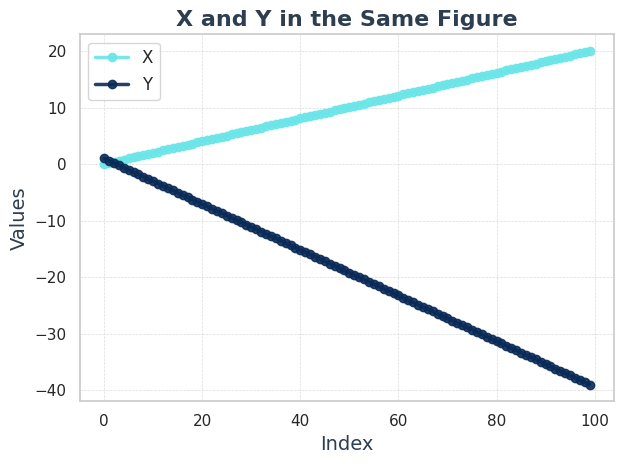

In [ ]:
plt.plot(x, marker='o', markersize=6, linestyle='-', linewidth=2.5, color='#6be5e8', alpha=0.9, label="X")

plt.plot(y,marker='o', markersize=6, linestyle='-', linewidth=2.5, color='#0a2b57', alpha=0.9, label="Y")

plt.title('X and Y in the Same Figure', fontsize=16, weight='bold', color='#2c3e50')
plt.xlabel('Index', fontsize=14, color='#2c3e50')
plt.ylabel('Values', fontsize=14, color='#2c3e50')
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(loc='best', fontsize=12)
plt.tight_layout()
plt.show()

# `03` Needed Functions

In [ ]:
def plot_loss_vs_iterations(max_iterations=600, decay_rate=100, color_scale="plasma"):
    iterations = np.arange(1, max_iterations + 1)
    loss = np.exp(-iterations / decay_rate)

    plt.figure(figsize=(10, 6))
    fig = px.scatter(
        x=iterations,
        y=loss,
        color=iterations,
        color_continuous_scale=color_scale,
        title="Loss vs Iterations",
        labels={"x": "Iterations", "y": "Loss"},
        opacity=0.8
    )

    fig.update_layout(
        title=dict(font=dict(size=20, color="darkblue"), x=0.5),
        xaxis=dict(title_font=dict(size=16), showgrid=True),
        yaxis=dict(title_font=dict(size=16), showgrid=True),
        coloraxis_colorbar=dict(title="Iteration Count"),
        plot_bgcolor="rgba(240, 240, 240, 0.6)"
    )

    fig.show()

In [ ]:
def plot_loss_with_decay(losses, decay_rate=200, line_color='red', fill_color='#e74c3c'):
    iterations = np.arange(1, len(losses) + 1)
    decayed_losses = losses * np.exp(-iterations / decay_rate)

    plt.figure(figsize=(10, 6))
    plt.plot(iterations, decayed_losses, color=line_color, linewidth=2, label="Loss")
    plt.fill_between(iterations, decayed_losses, color=fill_color, alpha=0.1)

    plt.title('Loss vs Iterations', fontsize=16, weight='bold', color='#2c3e50')
    plt.xlabel('Iterations', fontsize=14, color='#2c3e50')
    plt.ylabel('Loss', fontsize=14, color='#2c3e50')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend(loc='best', fontsize=12)
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_residuals():
    residuals = y - y_pred

    plt.figure(figsize=(10, 6))
    plt.scatter(y_pred, residuals, marker='X', c='#6d99c8', s=80, edgecolor='black', label='Residuals')
    plt.axhline(y=0, color='#6be5e8', linestyle='--')

    plt.title('Residuals Plot', fontsize=16, weight='bold', color='#2c3e50')
    plt.xlabel('Predicted Values', fontsize=14, color='#2c3e50')
    plt.ylabel('Residuals', fontsize=14, color='#2c3e50')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend(loc='best', fontsize=12)
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_loss_surface(all_theta_0, all_theta_1, losses):
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection='3d')

    all_theta_0 = np.array(all_theta_0)
    all_theta_1 = np.array(all_theta_1)
    losses = np.array(losses)

    # Create the surface plot
    plot_surface_obj = ax.plot_surface(all_theta_0[:, None], all_theta_1[None, :], losses.reshape(1, -1), cmap='viridis', alpha=0.8)

    cbar = fig.colorbar(plot_surface_obj, ax=ax, shrink=0.6, pad=0.1)
    cbar.set_label("Loss Value", fontsize=12)

    ax.set_xlabel('theta_0', fontsize=14, color='#2c3e50')
    ax.set_ylabel('theta_1', fontsize=14, color='#2c3e50')
    ax.set_zlabel('Loss', fontsize=14, color='#2c3e50')
    plt.title("Loss per Weights", fontsize=16, weight='bold', color='#2c3e50')

    plt.tight_layout()
    ax.view_init(30, 200)
    plt.show()

In [ ]:
def plot_loss_vs_theta1(all_theta_1, loss):
    decay_rate = 200
    iterations = np.arange(1, len(losses) + 1)
    decayed_losses = losses * np.exp(-iterations / decay_rate)

    plt.figure(figsize=(10, 6))
    fig = px.scatter(
        x=all_theta_1,
        y=loss,
        color=iterations,
        color_continuous_scale="plasma",
        title="Loss vs theta_1",
        labels={'x': 'theta_1', 'y': 'Loss'},
        opacity=0.8
    )

    fig.update_layout(
        title=dict(font=dict(size=20, color="darkblue"), x=0.5),
        xaxis=dict(title_font=dict(size=16), showgrid=True),
        yaxis=dict(title_font=dict(size=16), showgrid=True),
        coloraxis_colorbar=dict(title="Iteration", tickvals=[]),
        plot_bgcolor="rgba(240, 240, 240, 0.6)"
    )

    fig.show()

In [ ]:
def plot_loss_vs_theta(all_theta_0, losses):
    decay_rate = 200
    iterations = np.arange(1, len(losses) + 1)
    decayed_losses = losses * np.exp(-iterations / decay_rate)

    plt.figure(figsize=(10, 6))
    fig = px.scatter(
        x=all_theta_0,
        y=losses,
        color=iterations,
        color_continuous_scale="plasma",
        title="Loss vs theta_0",
        labels={'x': 'theta_0', 'y': 'Loss'},
        opacity=0.8
    )

    fig.update_layout(
        title=dict(font=dict(size=20, color="darkblue"), x=0.5),
        xaxis=dict(title_font=dict(size=16), showgrid=True),
        yaxis=dict(title_font=dict(size=16), showgrid=True),
        coloraxis_colorbar=dict(title="Iteration", tickvals=[]),
        plot_bgcolor="rgba(240, 240, 240, 0.6)"
    )

    fig.show()

In [ ]:
def plot_regression_convergence(x, y, all_theta_0, all_theta_1, step=20):

    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='#6d99c8', label='Data Points')

    for i in range(0, len(all_theta_0), step):
        y_pred = all_theta_0[i] + all_theta_1[i] * x
        plt.plot(x, y_pred, color='red', alpha=(i + 1) / len(all_theta_0), label=f'Iteration {i + 1}')

    plt.xlabel('X', fontsize=14, color='#1f4068', labelpad=10)
    plt.ylabel('Y', fontsize=14, color='#1f4068', labelpad=10)
    plt.title('Regression Lines Till Convergence', fontsize=18, color='#1f4068', pad=20)

    plt.grid(True, which='both', linestyle='--', linewidth=0.5, color='gray', alpha=0.7)
    plt.legend(title="Regression Iterations", title_fontsize=12, fontsize=10, loc='best', frameon=False, framealpha=0.7)
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_linear_regression(x, y, y_pred):
    plt.figure(figsize=(10, 6))
    plt.scatter(x, y, color='black', label='Actual Data points')
    plt.scatter(x, y, color='#6be5e8', marker='X', label='Predicted Data points')
    plt.plot(x, y_pred, label='Regression line', color='#0a2b57')
    plt.xlabel('x', fontsize=14, color='#2c3e50')
    plt.ylabel('y', fontsize=14, color='#2c3e50')
    plt.title('Linear Regression', fontsize=16, color='#2c3e50')
    plt.legend(loc='best', fontsize=12, shadow=True)
    plt.gca().set_title("Gradient Descent Linear Regressor")
    plt.show()

In [ ]:
def plot_3d_linear_regression(x, y, y_pred, theta_0, theta_1):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(x, y, y_pred, c='#6be5e8', marker='o', s=30, edgecolor='black', label='Data points', alpha=0.7)

    X_grid, Y_grid = np.meshgrid(np.linspace(x.min(), x.max(), 30), np.linspace(y.min(), y.max(), 30))
    h_grid = theta_0 + theta_1 * X_grid

    ax.plot_surface(X_grid, Y_grid, h_grid, color='#6be5e8', alpha=0.5, rstride=100, cstride=100, label="Fitted Plane")

    plt.title('Linear Regression Fit', fontsize=16, weight='bold', color='#2c3e50')
    ax.set_xlabel('X', fontsize=14, color='#2c3e50')
    ax.set_ylabel('Y', fontsize=14, color='#2c3e50')
    ax.set_zlabel('Y_predicted', fontsize=14, color='#2c3e50')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend(loc='best', fontsize=12)
    plt.tight_layout()
    plt.show()

In [ ]:
def cost_function(theta_0, theta_1, x, y):
    m = len(x)
    return (1 / (2 * m)) * np.sum((y - (theta_0 + theta_1 * x)) ** 2)

def plot_contour_with_gd(x, y, theta_0, theta_1, losses, y_pred, all_theta_0, all_theta_1):
    theta_0_vals = np.linspace(-10, 10, 100)
    theta_1_vals = np.linspace(-10, 10, 100)
    theta_0_grid, theta_1_grid = np.meshgrid(theta_0_vals, theta_1_vals)

    J_vals = np.zeros_like(theta_0_grid)
    for i in range(len(theta_0_vals)):
        for j in range(len(theta_1_vals)):
            J_vals[i, j] = cost_function(theta_0_grid[i, j], theta_1_grid[i, j], x, y)

    plt.figure(figsize=(10, 6))
    cp = plt.contour(theta_0_grid, theta_1_grid, J_vals, levels=50, cmap='coolwarm', alpha=0.7)
    plt.colorbar(cp)

    plt.plot(all_theta_0, all_theta_1, marker='o', color='black', label='Gradient Descent Path', markersize=1)

    plt.scatter(all_theta_0[0], all_theta_1[0], color='red', label='Initial Theta')
    plt.scatter(all_theta_0[-1], all_theta_1[-1], color='blue', label='Final Theta')

    plt.title('Contour Plot of Cost Function with Gradient Descent', fontsize=16, weight='bold', color='#2c3e50')
    plt.xlabel('Theta 0', fontsize=14, color='#2c3e50')
    plt.ylabel('Theta 1', fontsize=14, color='#2c3e50')
    plt.legend(loc='best', fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()

In [ ]:
def plot_gd_comparison(x, y, gd_results):
    fig = go.Figure()

    for gd_type, (theta_0, theta_1, losses, y_pred, all_theta_0, all_theta_1) in gd_results.items():
        fig.add_trace(go.Scatter(x=x, y=y_pred, mode='lines', name=f'{gd_type} Regression Line'))

    fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name='Actual Data'))

    fig.update_layout(title='Comparison of Gradient Descent Variations',
                      xaxis_title='X',
                      yaxis_title='Y')
    fig.show()

In [ ]:
def plot_loss_with_decay_comparison(gd_funcs):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    max_iterations = max(len(results[2]) for results in gd_funcs.values())
    iterations = np.arange(1, max_iterations + 1)

    for i, (gd_type, results) in enumerate(gd_funcs.items()):
        ax = axes[i]
        losses = results[2]

        if len(losses) < max_iterations:
            losses = np.pad(losses, (0, max_iterations - len(losses)), constant_values=np.nan)

        ax.plot(iterations[:len(losses)], losses, label=gd_type, linewidth=2, marker='o', markersize=6, color = 'red')

        ax.set_xlabel("Iterations", fontsize=12)
        ax.set_ylabel("Loss", fontsize=12)
        ax.set_title(f"{gd_type} Loss", fontsize=14)
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.legend(title="GD Variations", fontsize=10)

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_3d_linear_regression_comparison(gd_funcs, x, y):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': '3d'})

    for i, (gd_type, results) in enumerate(gd_funcs.items()):
        ax = axes[i]
        theta_0, theta_1, losses, y_pred, all_theta_0, all_theta_1 = results

        ax.scatter(x, y, y_pred, c='#6be5e8', marker='o', s=30, edgecolor='black', label='Data points', alpha=0.7)


        X_grid = np.linspace(x.min(), x.max(), 30)
        Y_grid = np.linspace(y.min(), y.max(), 30)
        X_grid, Y_grid = np.meshgrid(X_grid, Y_grid)
        h_grid = theta_0 + theta_1 * X_grid

        ax.plot_surface(X_grid, Y_grid, h_grid, color='#6be5e8', alpha=0.5, rstride=100, cstride=100, label="Fitted Plane")


        ax.set_title(f"{gd_type} - Linear Regression Fit", fontsize=16, weight='bold', color='#2c3e50')
        ax.set_xlabel('X', fontsize=14, color='#2c3e50')
        ax.set_ylabel('Y', fontsize=14, color='#2c3e50')
        ax.set_zlabel('Y_predicted', fontsize=14, color='#2c3e50')
        ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
        ax.legend(loc='best', fontsize=12)

    plt.tight_layout()
    plt.show()

In [ ]:
def plot_loss_surface_comparison(gd_funcs, x, y):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={'projection': '3d'})

    for i, (gd_type, results) in enumerate(gd_funcs.items()):
        ax = axes[i]
        theta_0, theta_1, losses, y_pred, all_theta_0, all_theta_1 = results

        theta_0_vals, theta_1_vals = np.meshgrid(np.linspace(min(all_theta_0), max(all_theta_0), 50),
                                                 np.linspace(min(all_theta_1), max(all_theta_1), 50))
        loss_vals = np.zeros_like(theta_0_vals)

        for i in range(len(theta_0_vals)):
            for j in range(len(theta_1_vals)):

                y_pred_grid = theta_0_vals[i, j] + theta_1_vals[i, j] * x

                loss_vals[i, j] = np.mean((y - y_pred_grid) ** 2)

        surf = ax.plot_surface(theta_0_vals, theta_1_vals, loss_vals, cmap='viridis', alpha=0.8)

        ax.set_title(f'{gd_type} Loss Surface', fontsize=14)
        ax.set_xlabel('theta_0', fontsize=12)
        ax.set_ylabel('theta_1', fontsize=12)
        ax.set_zlabel('Loss', fontsize=12)

        fig.colorbar(surf, ax=ax, shrink=0.6, aspect=5)

    plt.tight_layout()
    plt.show()

# `04` Gradient Descent Variations



## `i` Batch / Vanilla


- This function to perform GD for single variable linear regression.
- The function takes the following input parameters:
   - Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
- The function returns the following:
 -   All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1


In [ ]:
x = (x - np.mean(x)) / np.std(x)
y = (y - np.mean(y)) / np.std(y)

In [ ]:
def batch_gradient_descent(x, y, alpha, max_iters):
  x = x.reshape(-1, 1)
  x = np.hstack([np.ones((x.shape[0],1)), x])

  theta = np.zeros(x.shape[1])
  losses = []
  all_theta_0 = []
  all_theta_1 = []

  for i in range(max_iters):
      y_pred = x.dot(theta)
      loss = np.mean((y_pred - y)**2)
      losses.append(loss)
      error = y_pred - y
      gradient = (1 / len(y)) * x.T.dot(error)
      theta = theta - alpha * gradient
      all_theta_0.append(theta[0])
      all_theta_1.append(theta[1])

  return theta[0], theta[1], losses, y_pred, all_theta_0, all_theta_1

#### Try function

In [ ]:
theta_0, theta_1, losses, y_pred, all_theta_0, all_theta_1 = batch_gradient_descent(x, y, 0.01, 600)

#### Calculate r2 score

In [ ]:
def calculate_r2(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    y_mean = np.mean(y_true)
    ss_tot = np.sum((y_true - y_mean) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)

    r2 = 1 - (ss_res / ss_tot)

    print(f"R² score: {r2:.4f}")
    return r2

In [ ]:
r2_score = calculate_r2(y, y_pred)

R² score: 1.0000


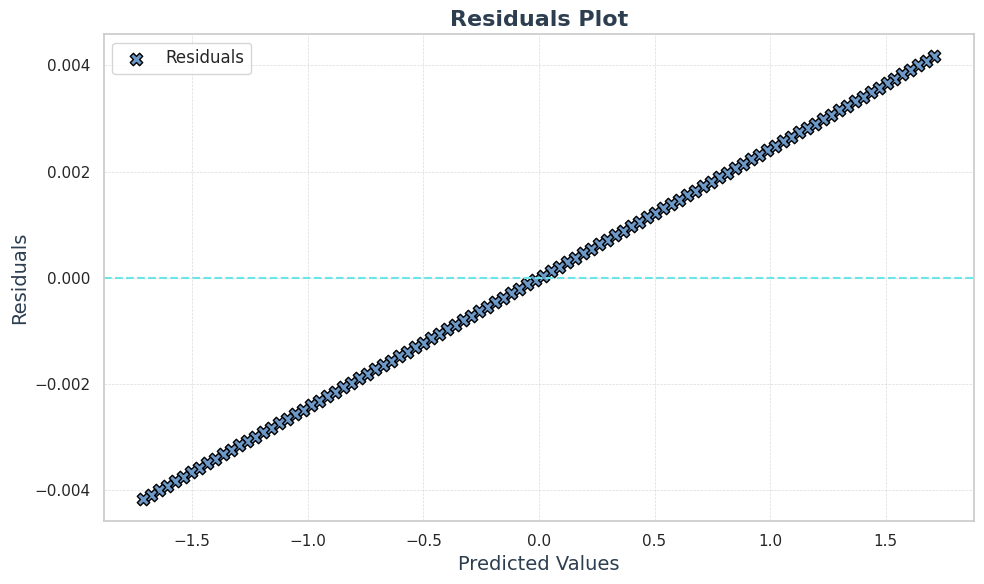

In [ ]:
plot_residuals()

#### Plot loss vs. epochs

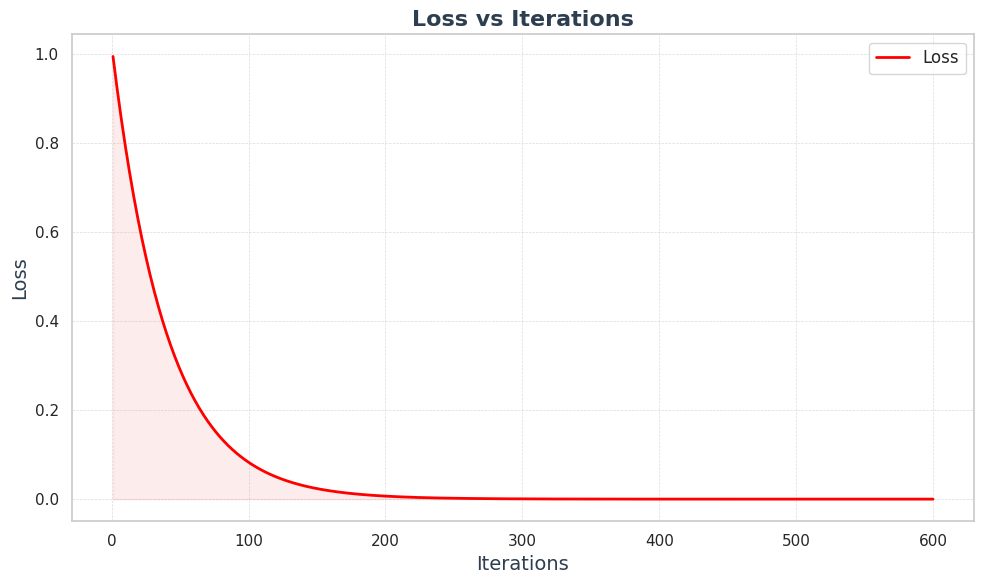

In [ ]:
plot_loss_with_decay(losses)

In [ ]:
plot_loss_vs_iterations()

<Figure size 1000x600 with 0 Axes>

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

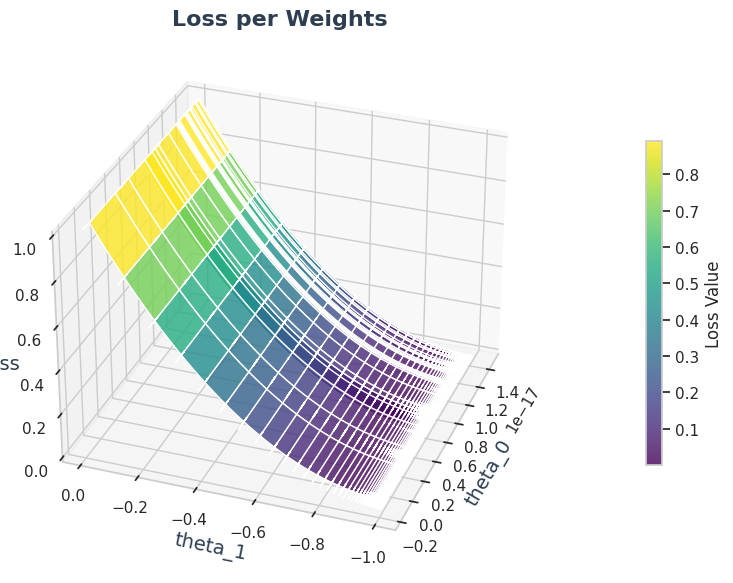

In [ ]:
plot_loss_surface(all_theta_0, all_theta_1, losses)

In [ ]:
plot_loss_vs_theta1(all_theta_1, losses)

<Figure size 1000x600 with 0 Axes>

In [ ]:
plot_loss_vs_theta(all_theta_0, losses)

<Figure size 1000x600 with 0 Axes>

#### Plot all regression lines till converge

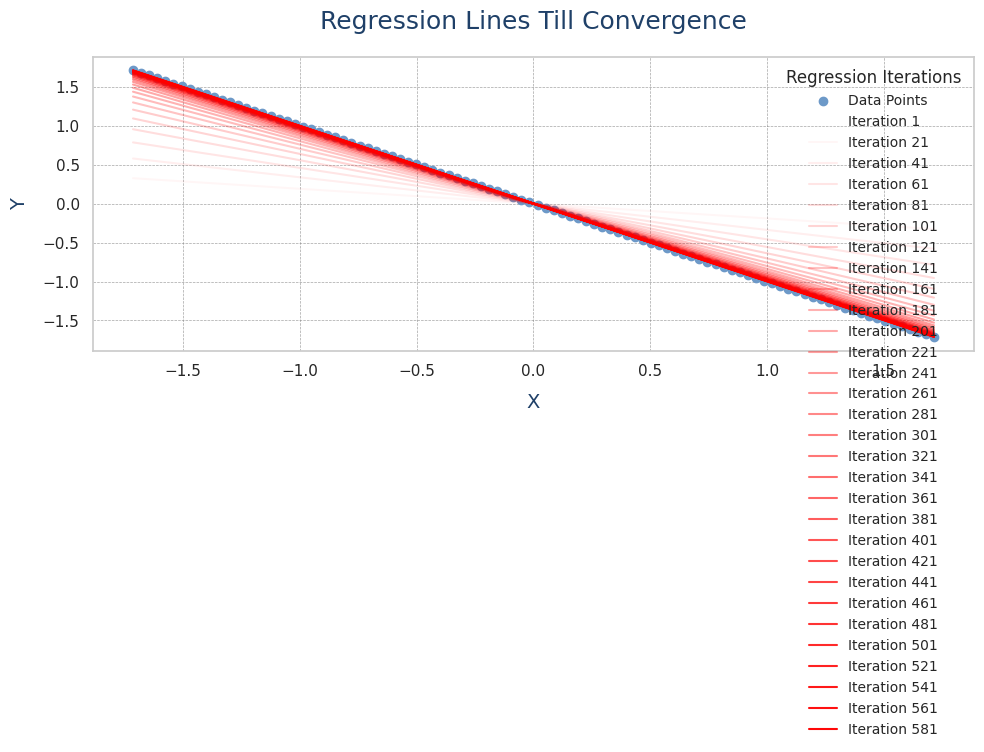

In [ ]:
plot_regression_convergence(x, y, all_theta_0, all_theta_1, step=20)

#### Plot the best regression line

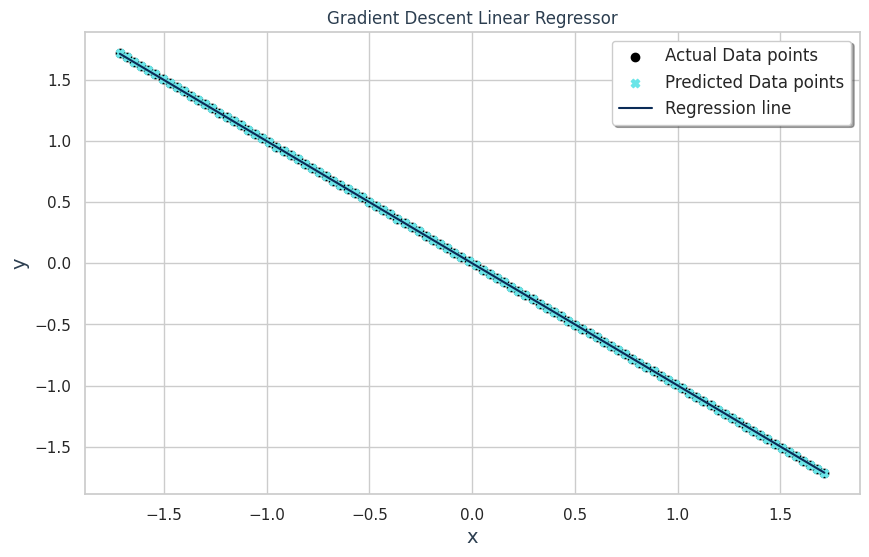

In [ ]:
plot_linear_regression(x, y, y_pred)

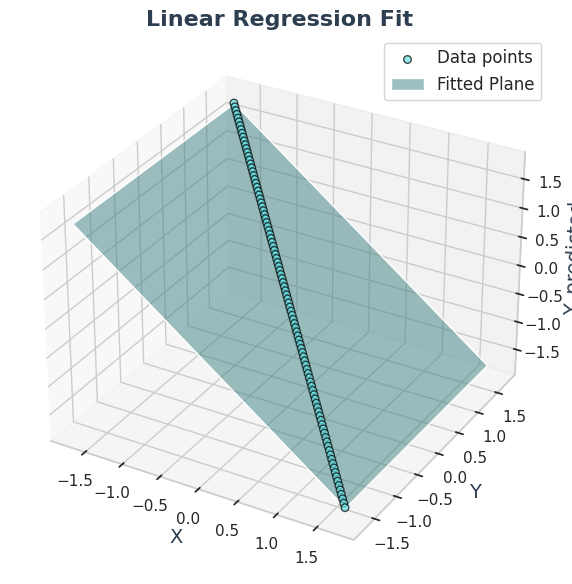

In [ ]:
plot_3d_linear_regression(x, y, y_pred, theta_0, theta_1)

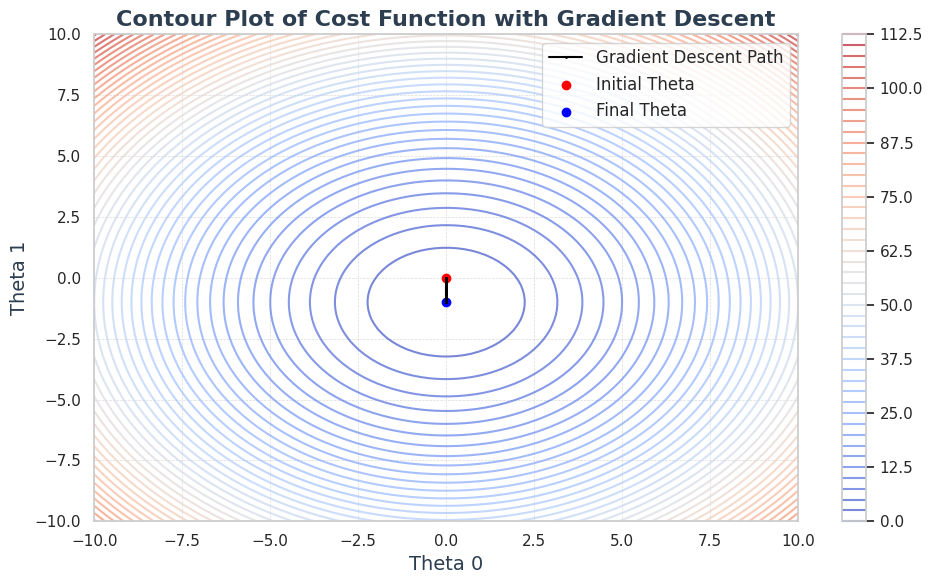

In [ ]:
plot_contour_with_gd(x, y, theta_0, theta_1, losses, y_pred, all_theta_0, all_theta_1)

- Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
- all regression lines till converge, and the best regression line
and show the difference in output.

In [ ]:
theta_0, theta_1, losses, y_pred, all_theta_0, all_theta_1 = batch_gradient_descent(x, y, 0.01, 200)

In [ ]:
r2_score = calculate_r2(y, y_pred)

R² score: 0.9817


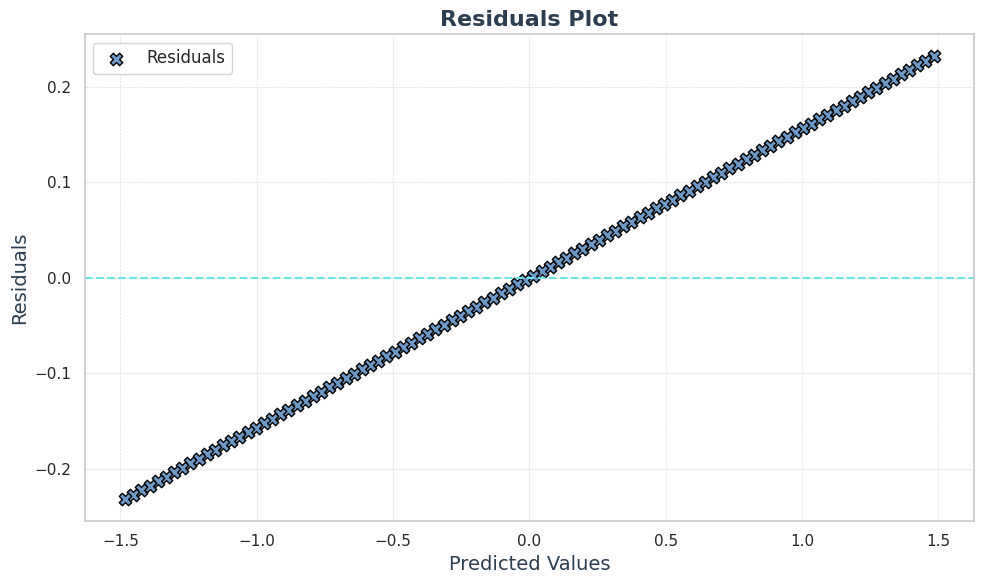

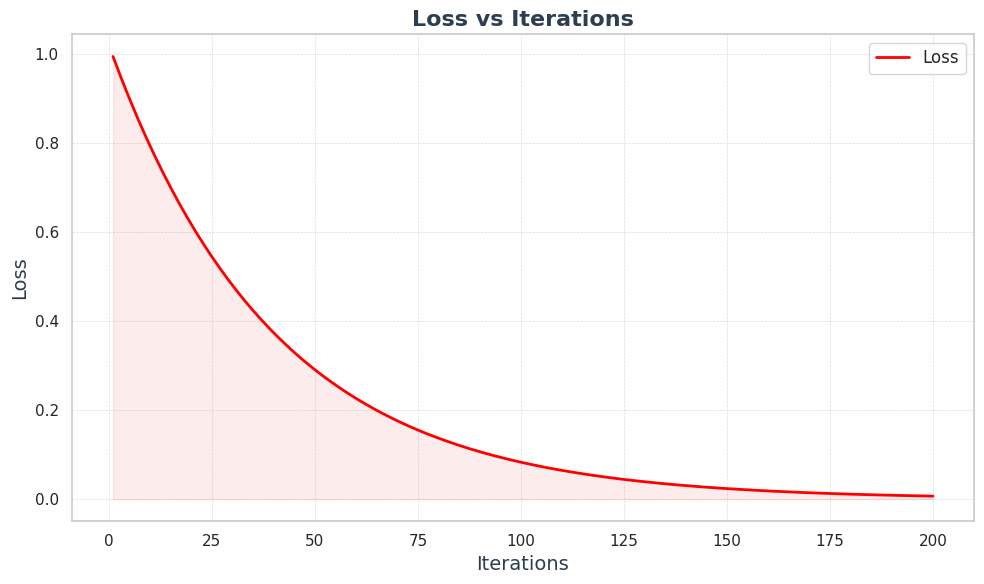

<Figure size 1000x600 with 0 Axes>

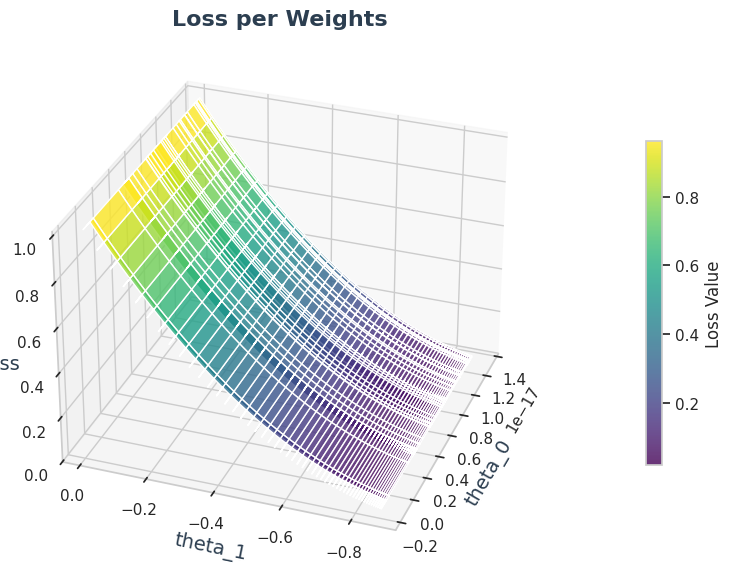

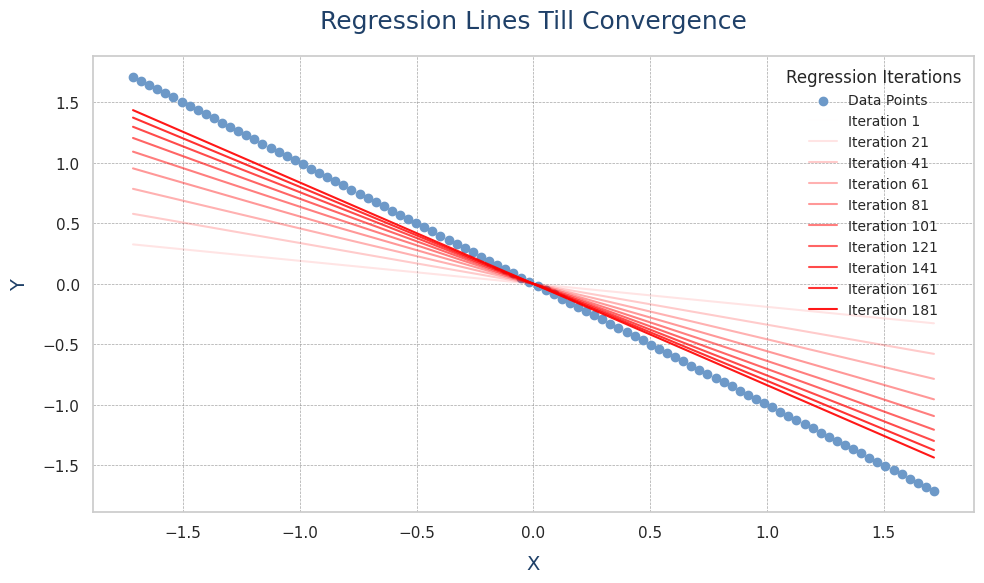

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

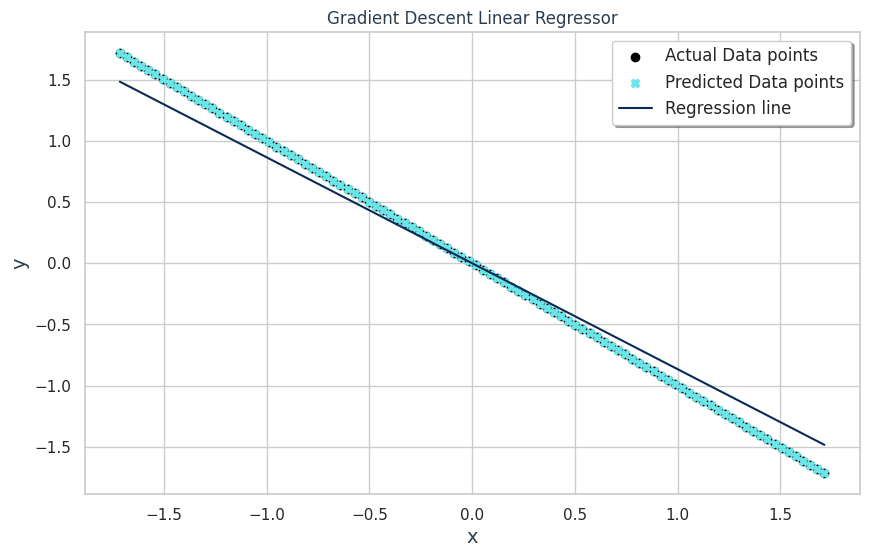

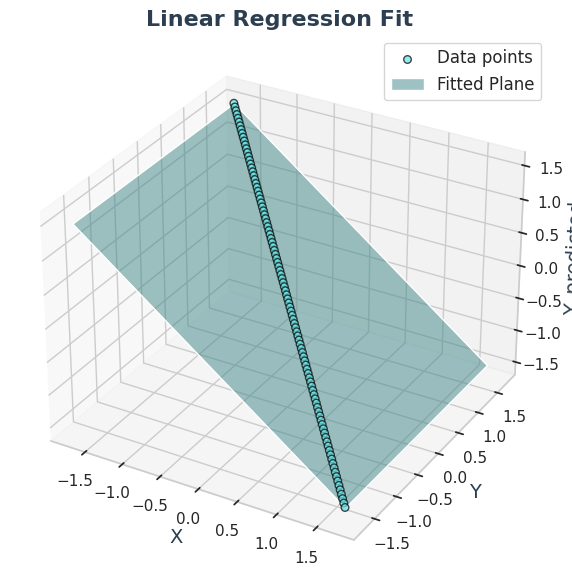

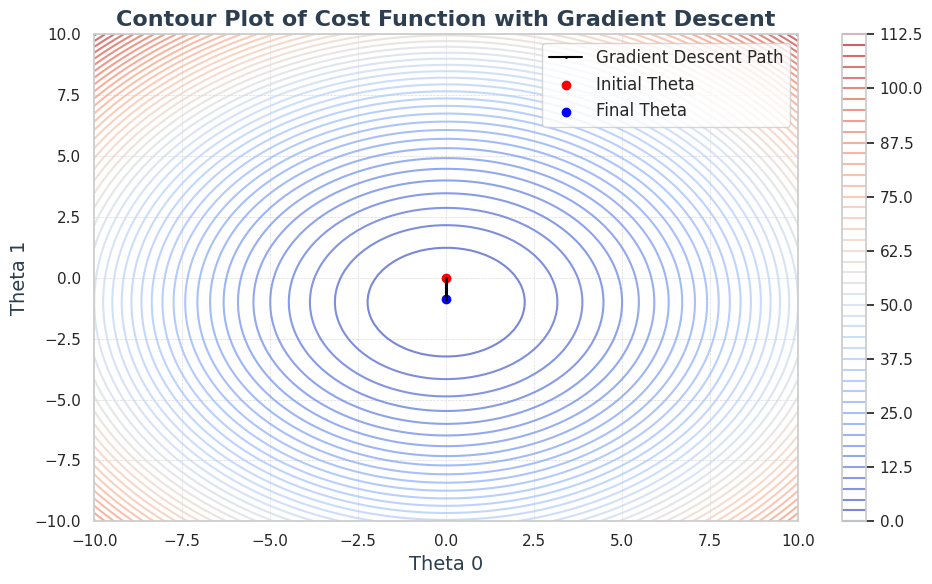

In [ ]:
plot_residuals()
plot_loss_with_decay(losses)
plot_loss_vs_iterations(max_iterations= 200)
plot_loss_surface(all_theta_0, all_theta_1, losses)
plot_regression_convergence(x, y, all_theta_0, all_theta_1, step=20)
plot_loss_vs_theta1(all_theta_1, losses)
plot_loss_vs_theta(all_theta_0, losses)
plot_linear_regression(x, y, y_pred)
plot_3d_linear_regression(x, y, y_pred, theta_0, theta_1)
plot_contour_with_gd(x, y, theta_0, theta_1, losses, y_pred, all_theta_0, all_theta_1)

In [ ]:
theta_0, theta_1, losses, y_pred, all_theta_0, all_theta_1 = batch_gradient_descent(x, y, 0.001, 1000)

In [ ]:
r2_score = calculate_r2(y, y_pred)

R² score: 0.8645


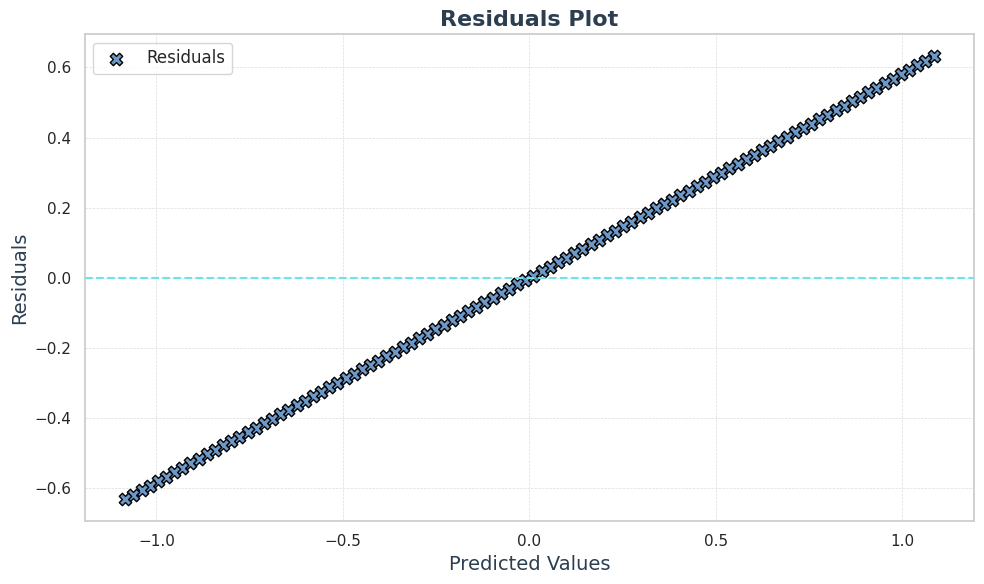

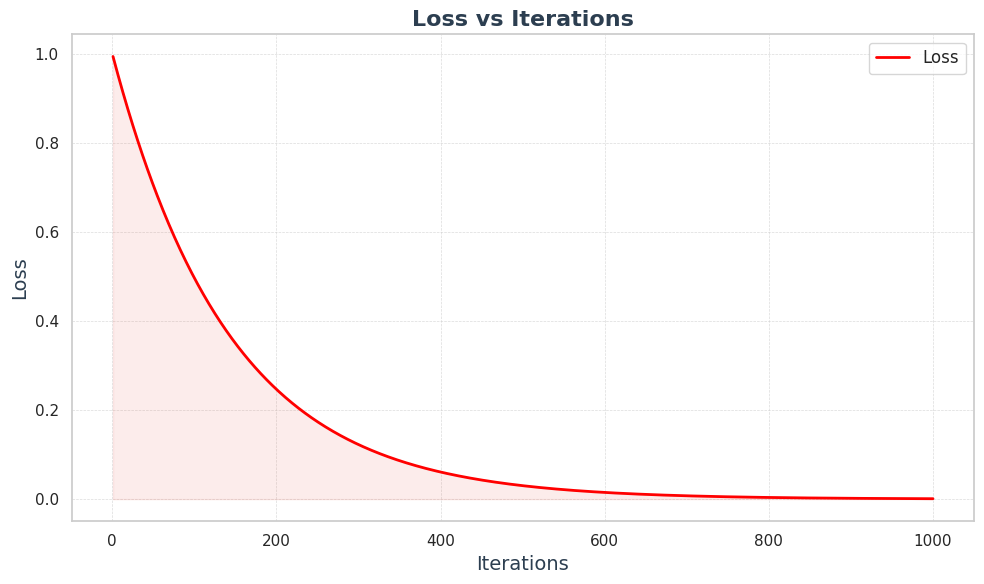

<Figure size 1000x600 with 0 Axes>

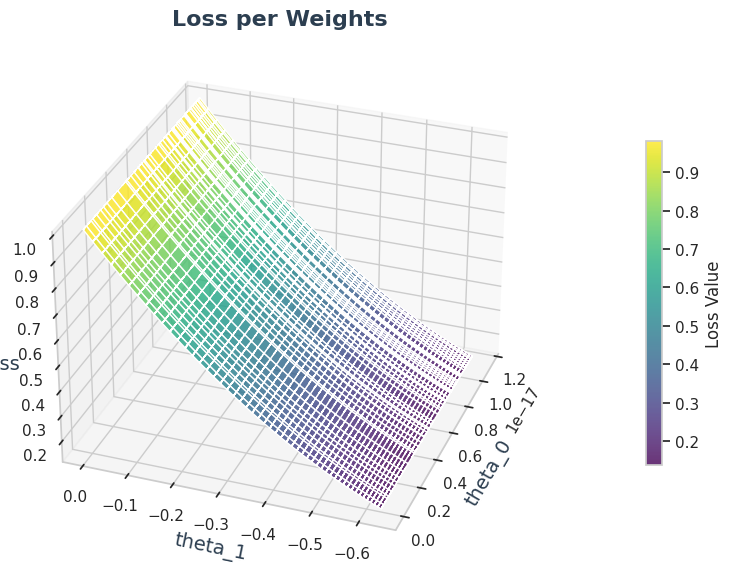

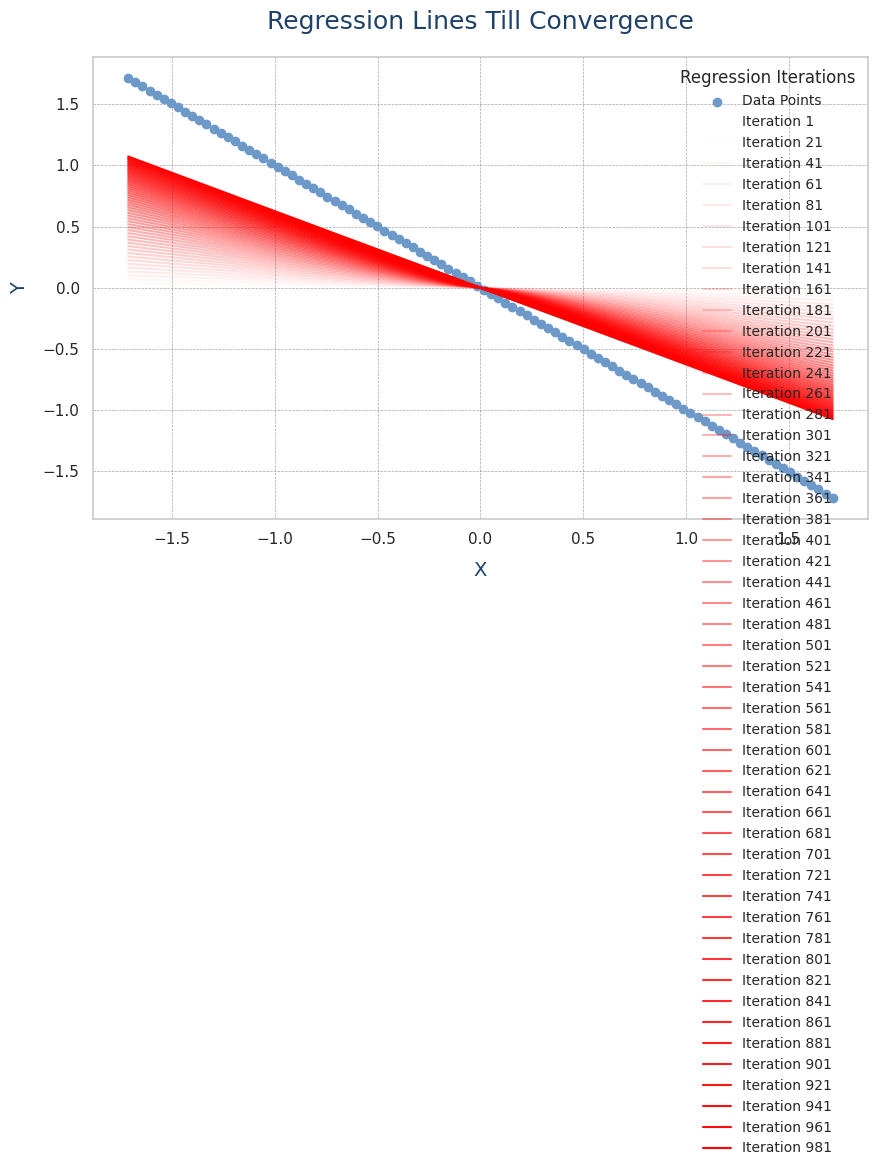

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

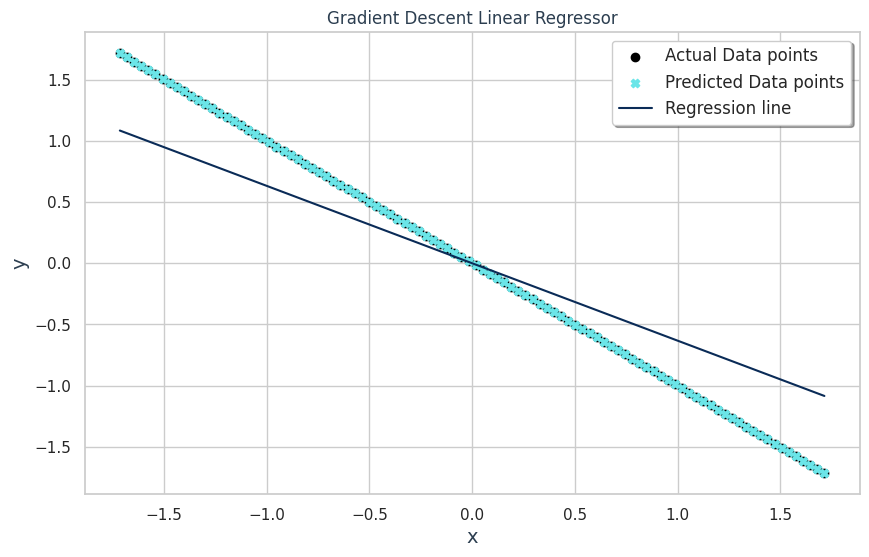

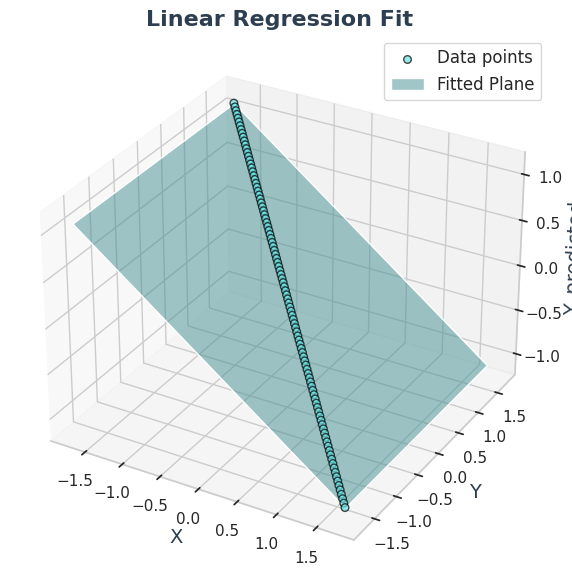

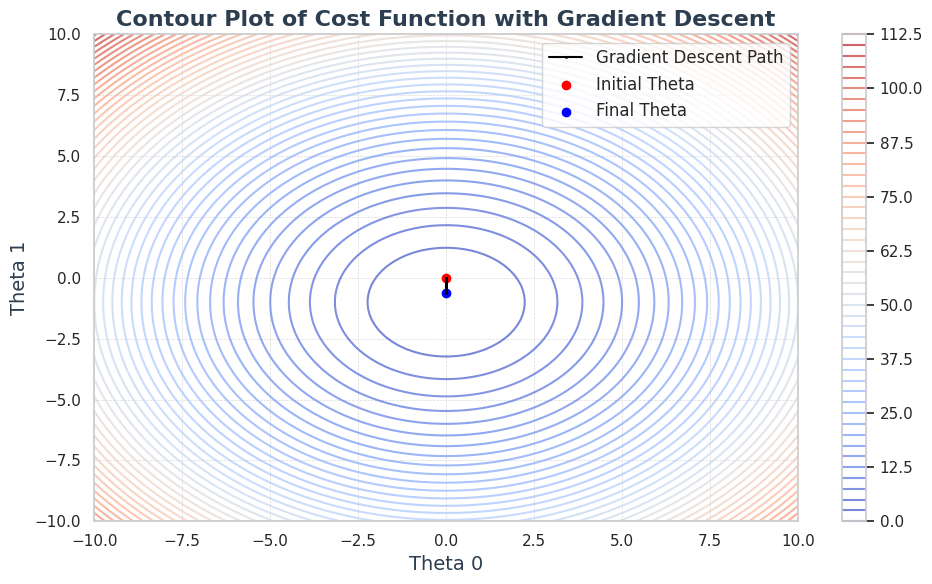

In [ ]:
plot_residuals()
plot_loss_with_decay(losses)
plot_loss_vs_iterations(max_iterations= 1000)
plot_loss_surface(all_theta_0, all_theta_1, losses)
plot_regression_convergence(x, y, all_theta_0, all_theta_1, step=20)
plot_loss_vs_theta1(all_theta_1, losses)
plot_loss_vs_theta(all_theta_0, losses)
plot_linear_regression(x, y, y_pred)
plot_3d_linear_regression(x, y, y_pred, theta_0, theta_1)
plot_contour_with_gd(x, y, theta_0, theta_1, losses, y_pred, all_theta_0, all_theta_1)

## `ii` Mini Batch






In [ ]:
def mini_batch_gradient_descent(x, y, alpha, max_iters, batch_size):
  x = x.reshape(-1, 1)
  x = np.hstack([np.ones((x.shape[0],1)), x])

  theta = np.zeros(x.shape[1])
  losses = []
  all_theta_0 = []
  all_theta_1 = []

  for i in range(max_iters):
      batch = np.random.choice(x.shape[0], batch_size, replace=False)
      x_batch = x[batch]
      y_batch = y[batch]

      y_pred = x_batch.dot(theta)
      loss = np.mean((y_pred - y_batch)**2)
      losses.append(loss)
      error = y_pred - y_batch
      gradient = (1 / batch_size) * x_batch.T.dot(error)
      theta = theta - alpha * gradient
      all_theta_0.append(theta[0])
      all_theta_1.append(theta[1])

  final_y_pred = x.dot(theta)

  return theta[0], theta[1], losses, final_y_pred, all_theta_0, all_theta_1

In [ ]:
theta_0, theta_1, losses, y_pred, all_theta_0, all_theta_1 = mini_batch_gradient_descent(x, y, 0.01, 1000, 10)

In [ ]:
r2_score = calculate_r2(y, y_pred)

R² score: 1.0000


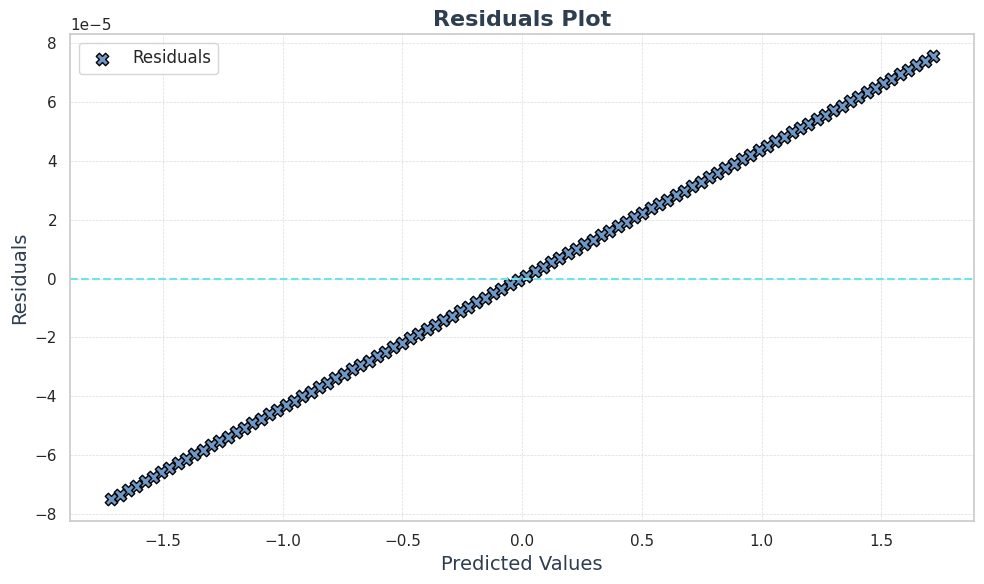

In [ ]:
plot_residuals()

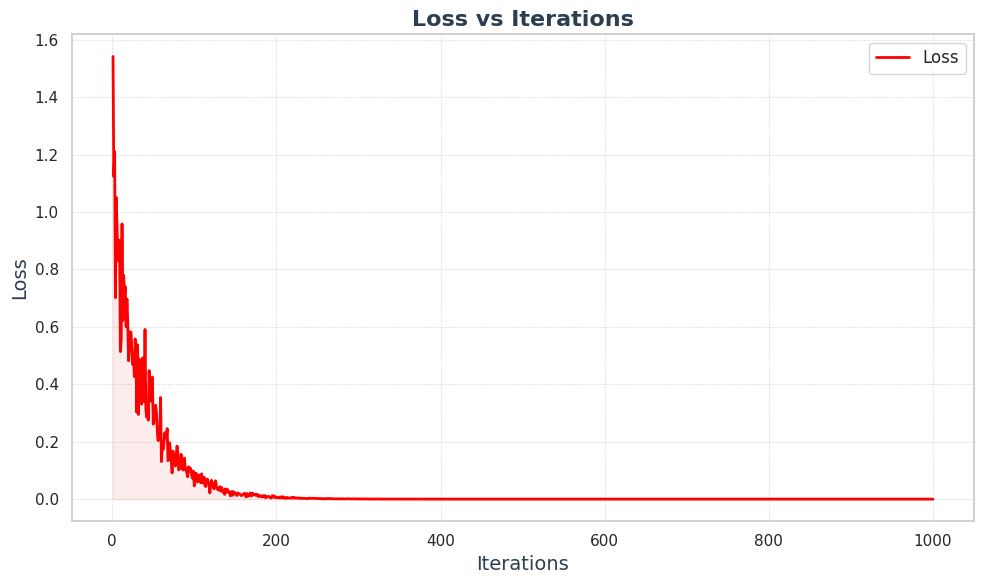

In [ ]:
plot_loss_with_decay(losses)

In [ ]:
plot_loss_vs_iterations(max_iterations=1000)

<Figure size 1000x600 with 0 Axes>

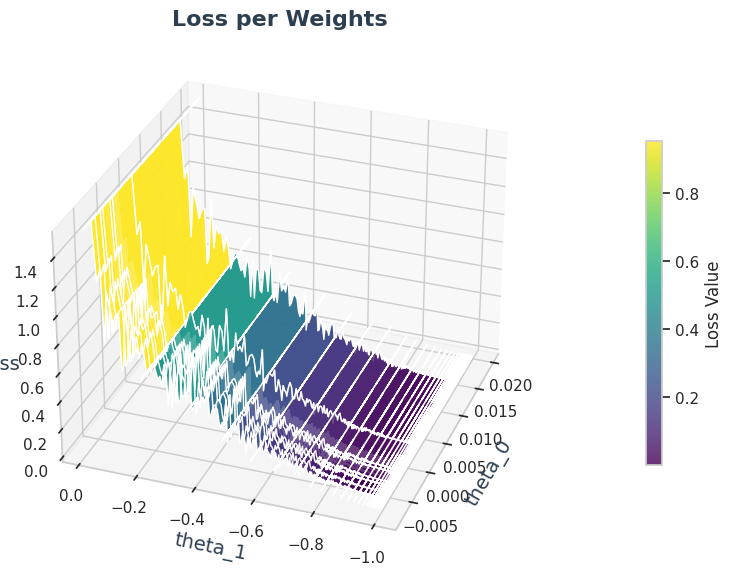

In [ ]:
plot_loss_surface(all_theta_0, all_theta_1, losses)

In [ ]:
plot_loss_vs_theta(all_theta_0, losses)

<Figure size 1000x600 with 0 Axes>

In [ ]:
plot_loss_vs_theta1(all_theta_1, losses)

<Figure size 1000x600 with 0 Axes>

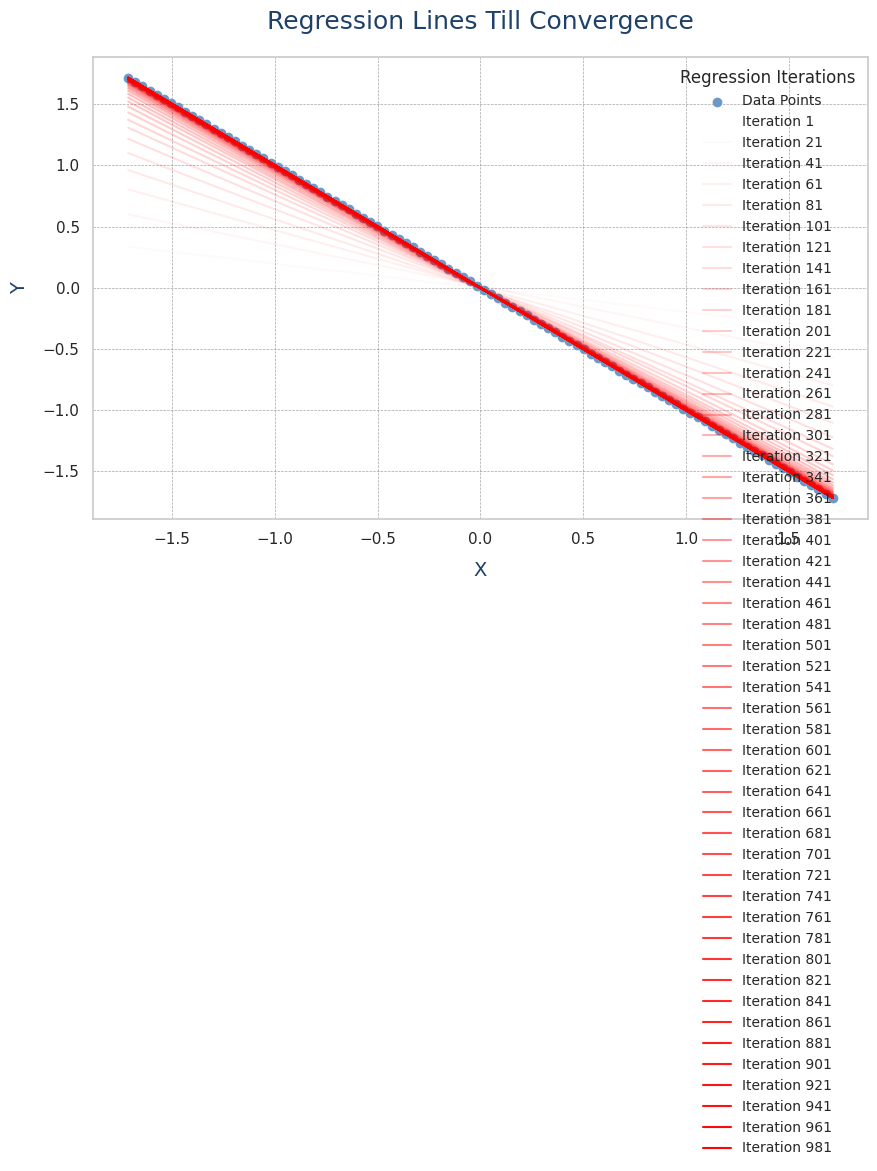

In [ ]:
plot_regression_convergence(x, y, all_theta_0, all_theta_1, step=20)

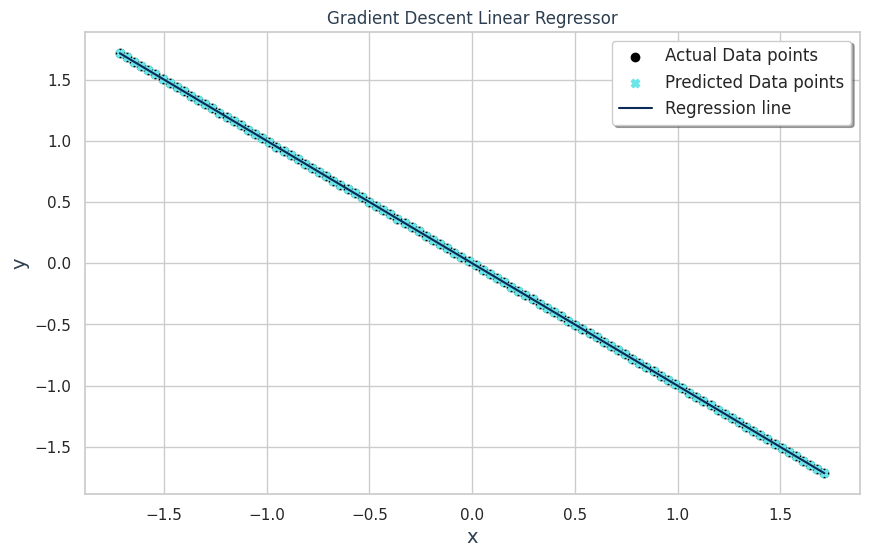

In [ ]:
plot_linear_regression(x, y, y_pred)

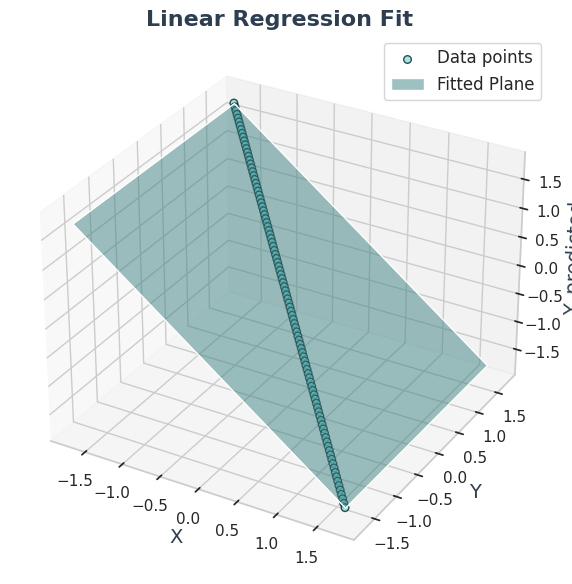

In [ ]:
plot_3d_linear_regression(x, y, y_pred, theta_0, theta_1)

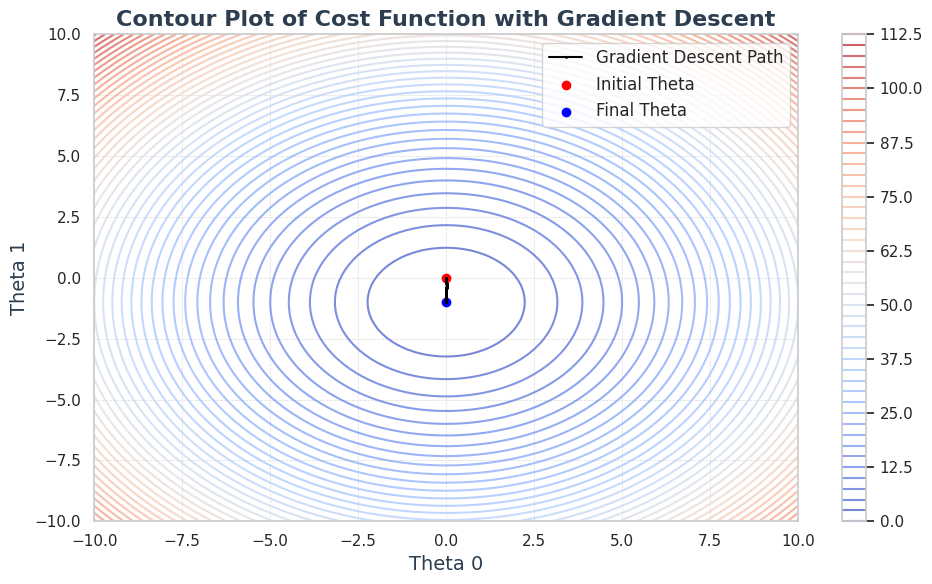

In [ ]:
plot_contour_with_gd(x, y, theta_0, theta_1, losses, y_pred, all_theta_0, all_theta_1)

## `iii` Stochastic

In [ ]:
def stochastic_gradient_descent(x, y, alpha, max_iters):
  x = x.reshape(-1, 1)
  x = np.hstack([np.ones((x.shape[0],1)), x])

  theta = np.zeros(x.shape[1])
  losses = []
  all_theta_0 = []
  all_theta_1 = []

  for i in range(max_iters):
    index = np.random.randint(0, x.shape[0])
    x_sample = x[index].reshape(1, -1)
    y_sample = y[index]

    y_pred = x_sample.dot(theta)
    loss = (y_pred - y_sample)**2
    losses.append(loss.item())
    error = y_pred - y_sample
    gradient = x_sample.T.dot(error)
    theta = theta - alpha * gradient
    all_theta_0.append(theta[0])
    all_theta_1.append(theta[1])

  final_y_pred = x.dot(theta)

  return theta[0], theta[1], losses, final_y_pred, all_theta_0, all_theta_1

In [ ]:
theta_0, theta_1, losses, y_pred, all_theta_0, all_theta_1 = stochastic_gradient_descent(x, y, 0.01, 400)

In [ ]:
r2_score = calculate_r2(y, y_pred)

R² score: 0.9997


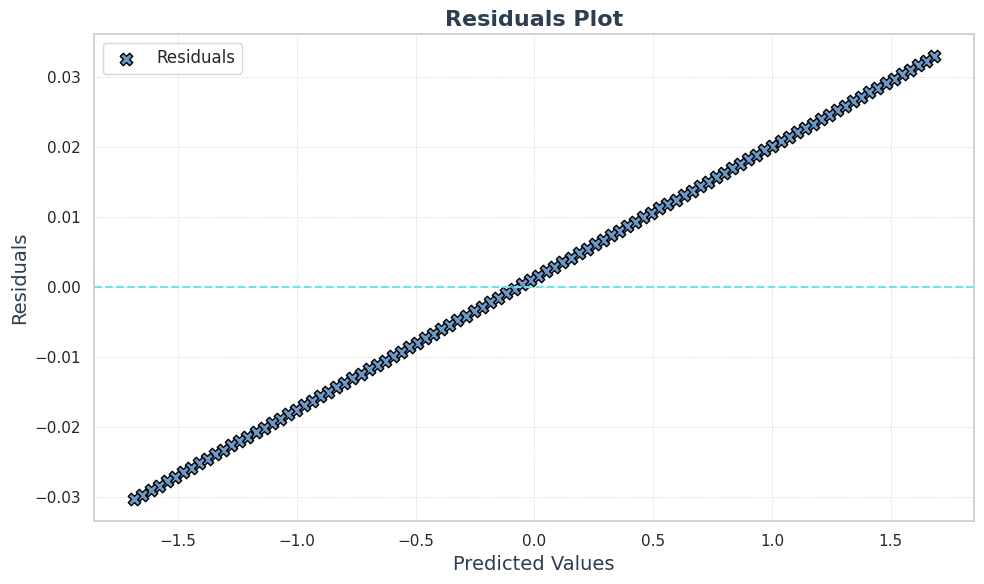

In [ ]:
plot_residuals()

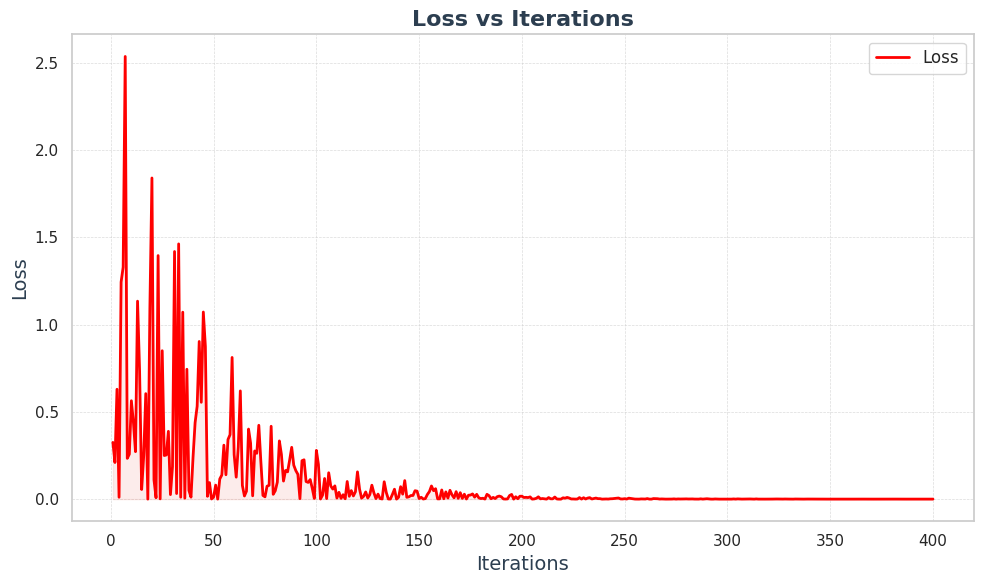

In [ ]:
plot_loss_with_decay(losses)

In [ ]:
plot_loss_vs_iterations(max_iterations=400)

<Figure size 1000x600 with 0 Axes>

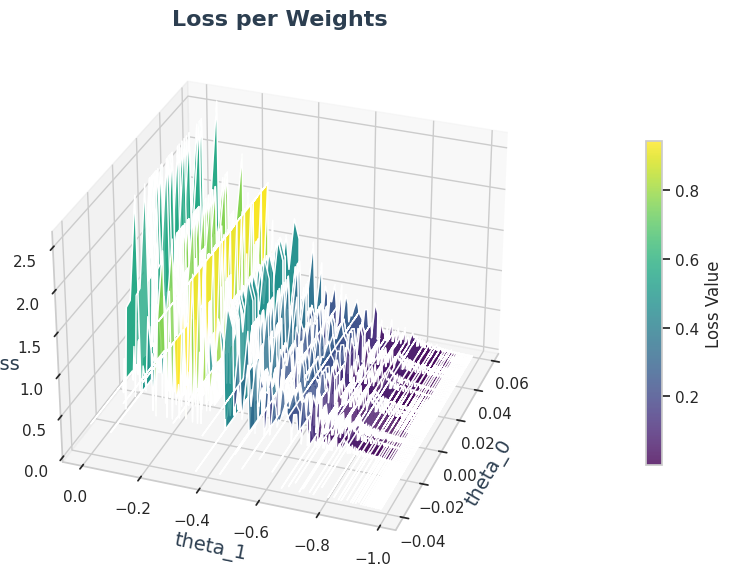

In [ ]:
plot_loss_surface(all_theta_0, all_theta_1, losses)

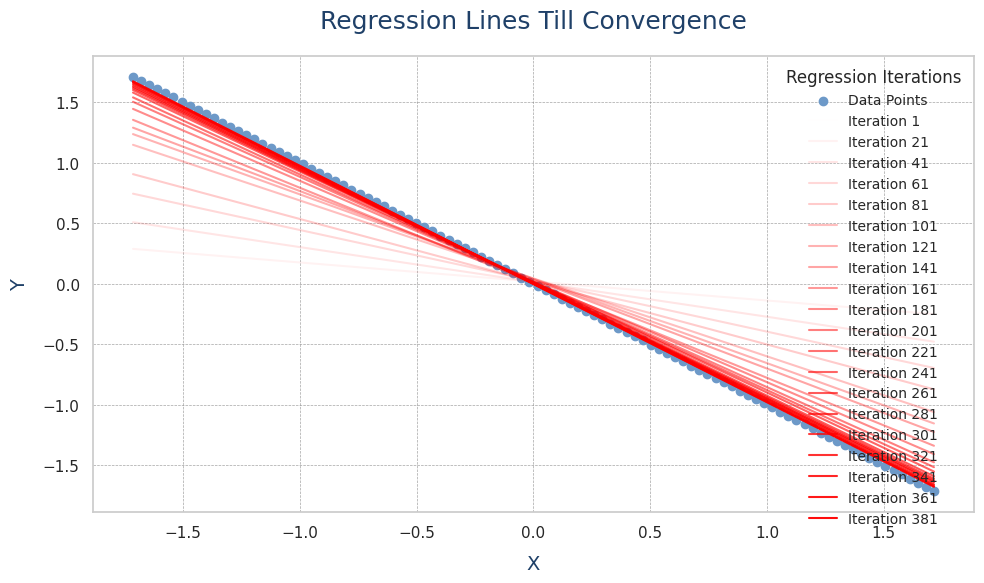

In [ ]:
plot_regression_convergence(x, y, all_theta_0, all_theta_1, step=20)

In [ ]:
plot_loss_vs_theta(all_theta_0, losses)

<Figure size 1000x600 with 0 Axes>

In [ ]:
plot_loss_vs_theta1(all_theta_1, losses)

<Figure size 1000x600 with 0 Axes>

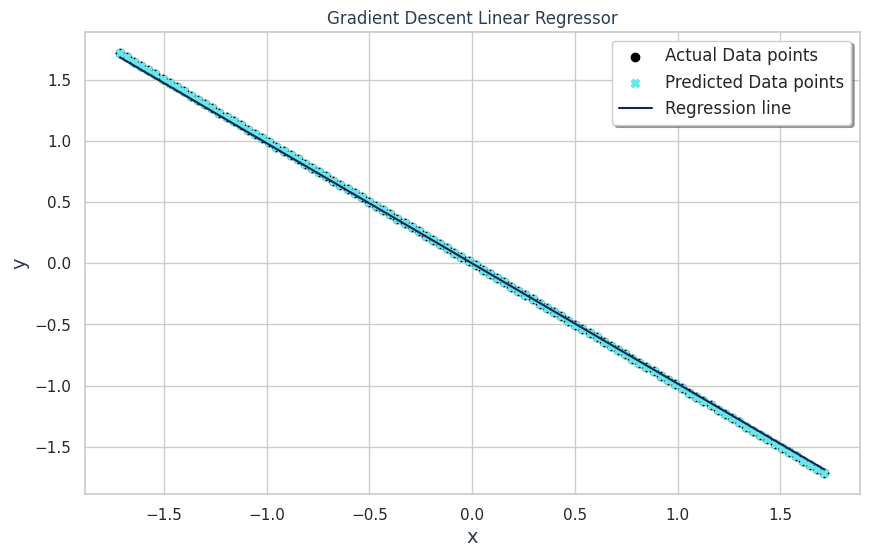

In [ ]:
plot_linear_regression(x, y, y_pred)

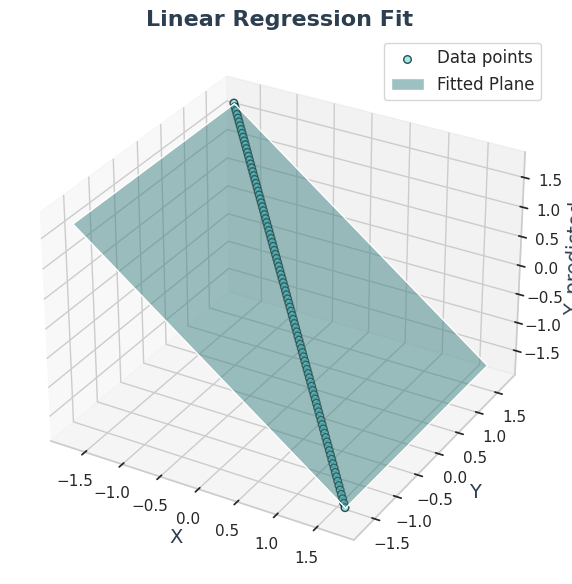

In [ ]:
plot_3d_linear_regression(x, y, y_pred, theta_0, theta_1)

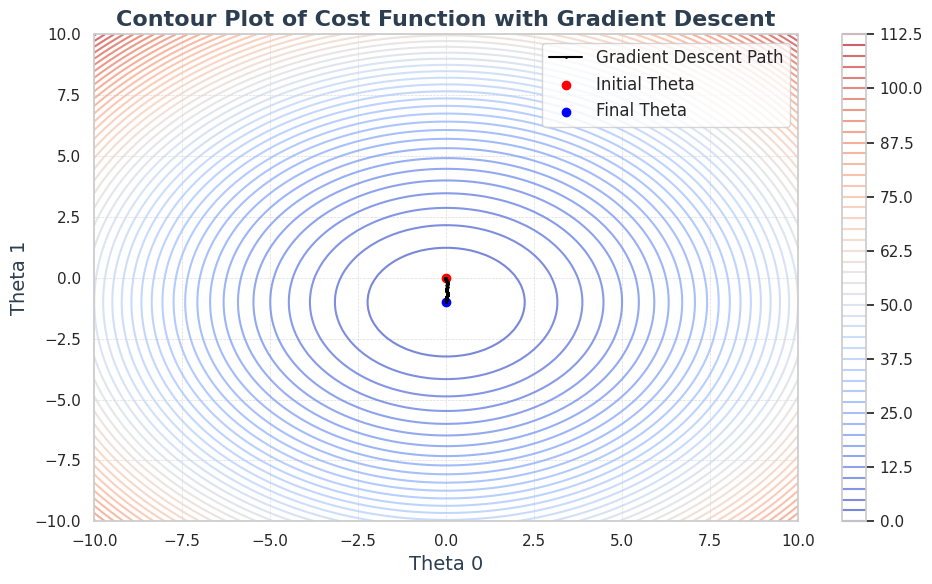

In [ ]:
plot_contour_with_gd(x, y, theta_0, theta_1, losses, y_pred, all_theta_0, all_theta_1)

# `04`  Compare Different GD Variations

In [ ]:
gd_results = {
    'Batch GD': batch_gradient_descent(x, y, 0.01, 600),
    'Mini-Batch GD': mini_batch_gradient_descent(x, y, 0.01, 1000, 10),
    'Stochastic GD': stochastic_gradient_descent(x, y, 0.01, 400)
}

plot_gd_comparison(x, y, gd_results)


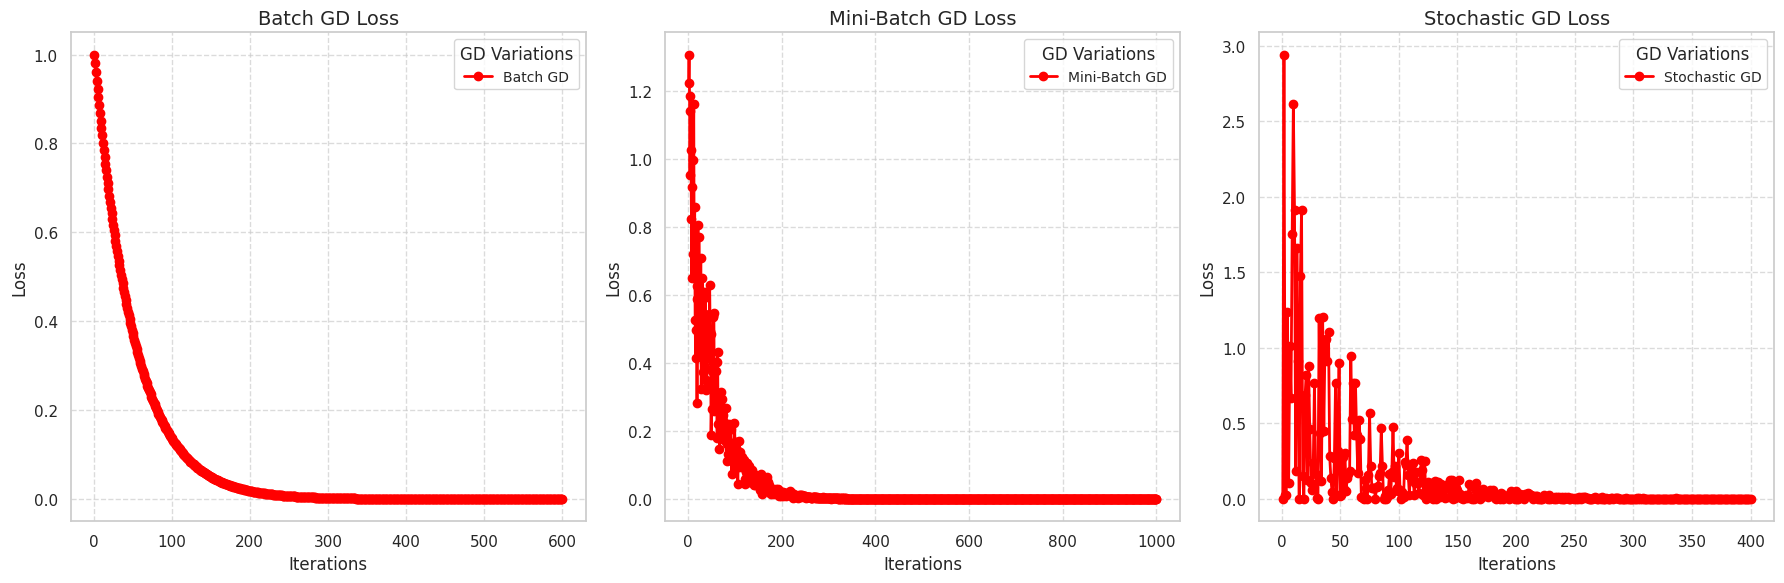

In [ ]:
gd_funcs = {
    "Batch GD": batch_gradient_descent(x, y, 0.01, 600),
    "Mini-Batch GD": mini_batch_gradient_descent(x, y, 0.01, 1000, 10),
    "Stochastic GD": stochastic_gradient_descent(x, y, 0.01, 400)
}

plot_loss_with_decay_comparison(gd_funcs)

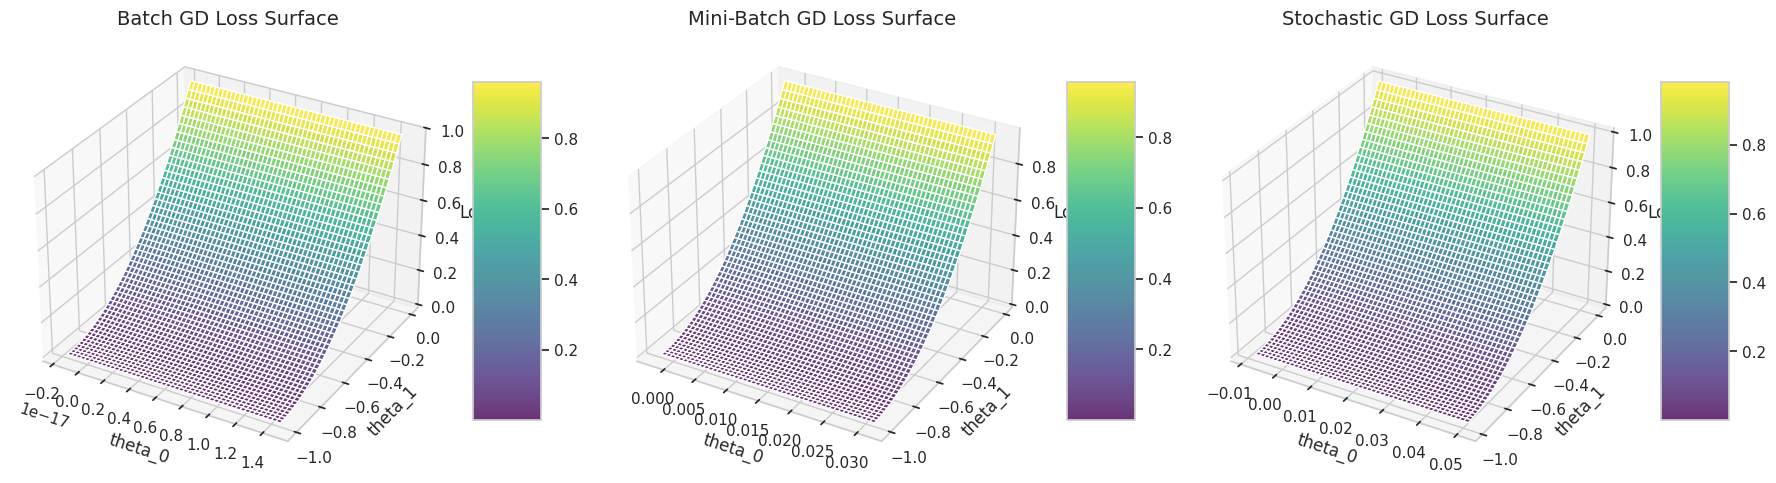

In [ ]:
plot_loss_surface_comparison(gd_funcs, x, y)

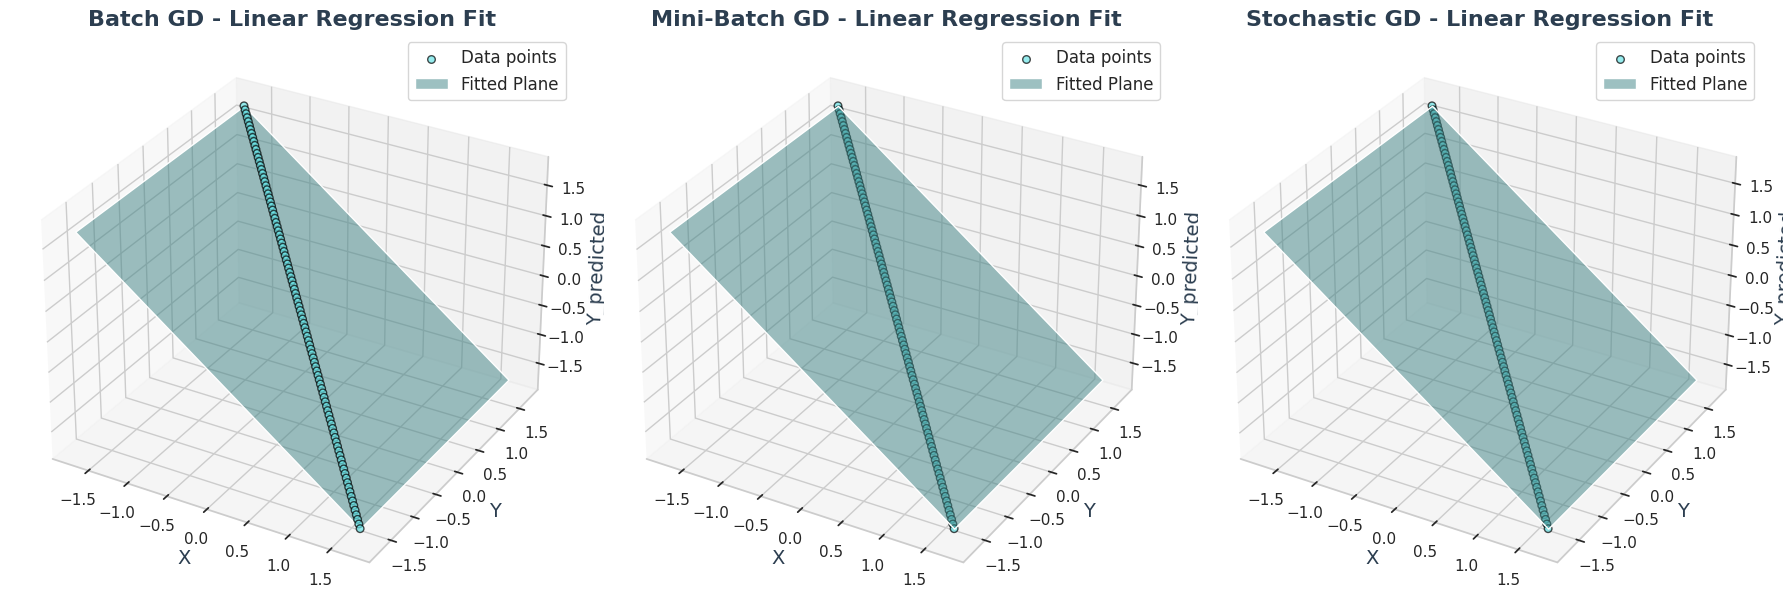

In [ ]:
plot_3d_linear_regression_comparison(gd_funcs, x, y)